# Import Libraries

In [94]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import KMeans
import pylab as pl
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


# Import Dataset

In [96]:
# create path 
path=r'C:\Users\baidy\Downloads\citibike_cleaned.csv'

In [97]:
#import data
citibike_df=pd.read_csv(os.path.join(path))

In [98]:
# Basic information of the dataset check 
citibike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49976 entries, 0 to 49975
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   trip_id                  49976 non-null  object 
 1   bike_id                  49976 non-null  int64  
 2   weekday                  49976 non-null  object 
 3   start_hour               49976 non-null  int64  
 4   start_time               49976 non-null  object 
 5   start_station_id         49976 non-null  int64  
 6   start_station_name       49976 non-null  object 
 7   start_station_latitude   49976 non-null  float64
 8   start_station_longitude  49976 non-null  float64
 9   end_time                 49976 non-null  object 
 10  end_station_id           49976 non-null  int64  
 11  end_station_name         49976 non-null  object 
 12  end_station_latitude     49976 non-null  float64
 13  end_station_longitude    49976 non-null  float64
 14  trip_duration         

In [99]:
citibike_df.head()

,trip_id,bike_id,weekday,start_hour,start_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_time,end_station_id,end_station_name,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender,age,gender_desc
0,LnQzQk,16013,Mon,18,<function to_datetime at 0x00000198E628EFC0>,523,W 38 St & 8 Ave,40.754666,-73.991382,<function to_datetime at 0x00000198E628EFC0>,334,W 20 St & 7 Ave,40.742388,-73.997262,993,Subscriber,1968.0,2,50.0,Female
1,IL9boN,15230,Thu,18,<function to_datetime at 0x00000198E628EFC0>,257,Lispenard St & Broadway,40.719392,-74.002472,<function to_datetime at 0x00000198E628EFC0>,236,St Marks Pl & 2 Ave,40.728419,-73.987140,581,Subscriber,1983.0,1,35.0,Male
2,46clGB,17942,Wed,19,<function to_datetime at 0x00000198E628EFC0>,479,9 Ave & W 45 St,40.760193,-73.991255,<function to_datetime at 0x00000198E628EFC0>,513,W 56 St & 10 Ave,40.768254,-73.988639,361,Subscriber,1989.0,1,29.0,Male
3,v7vdFt,19683,Sat,11,<function to_datetime at 0x00000198E628EFC0>,527,E 33 St & 1 Ave,40.743156,-73.974347,<function to_datetime at 0x00000198E628EFC0>,441,E 52 St & 2 Ave,40.756014,-73.967416,561,Subscriber,1988.0,2,30.0,Female
4,VGBsb5,18024,Sat,18,<function to_datetime at 0x00000198E628EFC0>,521,8 Ave & W 31 St,40.750450,-73.994811,<function to_datetime at 0x00000198E628EFC0>,476,E 31 St & 3 Ave,40.743943,-73.979661,2296,Non-Subscriber,1978.0,0,40.0,Unknown


#  The dataset contains 49976 entries and 20 columns,including categorical and numerical columns. To prepare the data for K-means clustering I will drop categorical columns ,will keep only the numerical columns which is relevent to clustering.

In [101]:
# Select numerical columns relevent for the clustering
num_cols=['trip_duration','age','start_station_latitude','start_station_longitude','end_station_latitude','end_station_longitude']

In [102]:
# Check if all columns exist in citibike_df
X=citibike_df[num_cols].copy()

In [103]:
# some cleaning might necessary ensure numeric conversion
X=X.apply(pd.to_numeric,errors='coerce')

In [104]:
# drop any rows with missing data in these columns
X=X.dropna()

In [105]:
# check shape of the data after cleaning
X.shape

(49976, 6)

In [106]:
# Standeradize the features
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

# Elbow method to determine optimal k 

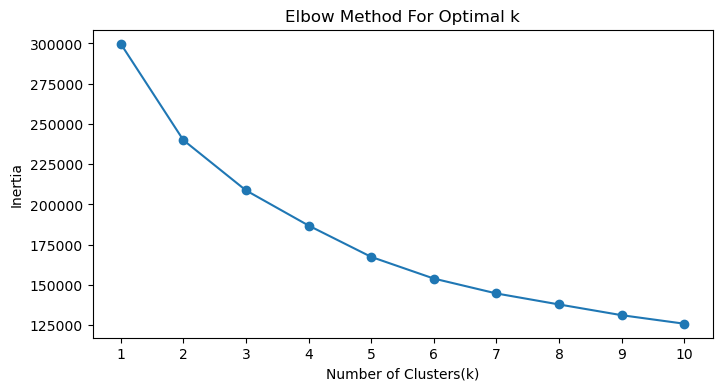

In [108]:
inertia_vals=[]
k_range=range(1,11)
for k in k_range:
    kmeans=KMeans(n_clusters=k,random_state=42,n_init=10)
    kmeans.fit(X_scaled)
    inertia_vals.append(kmeans.inertia_)

plt.figure(figsize=(8,4))
plt.plot(k_range,inertia_vals,marker='o')
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.xticks(k_range)
plt.show()

In [109]:
# Based on the Elbow plot , let's chose k=4 (for demonstration purposes)
optimal_k=4

kmeans_final=KMeans(n_clusters=optimal_k,random_state=42,n_init=10)
kmeans_final.fit(X_scaled)

KMeans(n_clusters=4, n_init=10, random_state=42)

In [110]:
# Add cluster labels to the dataframe
X['cluster']=kmeans_final.labels_

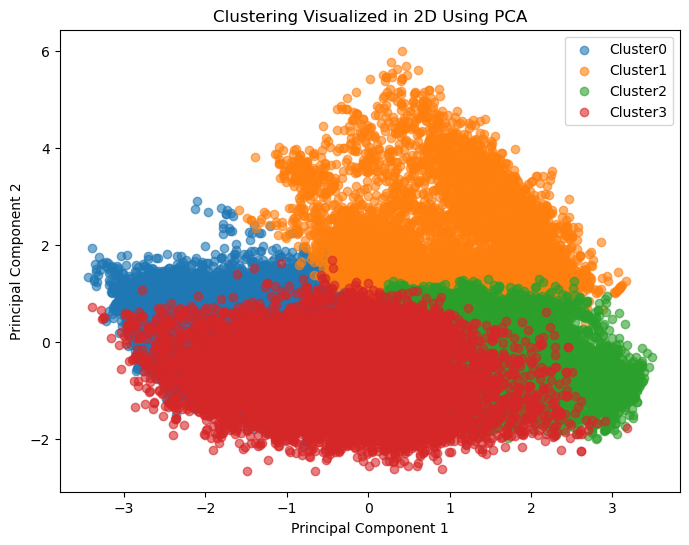

In [111]:
# will use pca for 2d visualization
pca=PCA(n_components=2,random_state=42)
X_pca=pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
for cluster in range(optimal_k):
    cluster_mask=(kmeans_final.labels_==cluster)
    plt.scatter(X_pca[cluster_mask,0],X_pca[cluster_mask,1],label='Cluster'+ str(cluster),alpha=0.6)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clustering Visualized in 2D Using PCA')
plt.legend()
plt.show()

# Calculate descriptive statistics and visualizations for bike trip clusters using the groupby() function

In [113]:
# Calculate descriptive statistics for each clusters
# Add the cluster labels back to our original dataframe
citibike_with_clusters=citibike_df.copy()
citibike_with_clusters=citibike_with_clusters.iloc[X.index]
citibike_with_clusters['cluster']=X['cluster']

In [114]:
# Calculate descriptive statistics for each clusters
cluster_stats=citibike_with_clusters.groupby('cluster').agg({
    'trip_duration':['mean','median','min','max','count'],
    'age':['mean','median','min','max'],
    'start_station_latitude':['min','mean','max'],
    'start_station_longitude':['mean','min','max'],
    'end_station_latitude':['mean','min','max'],
    'end_station_longitude':['mean','min','max'],
    'gender':lambda x:(x==1).mean(),
    'subscriber':lambda x:(x=='Subscriber').mean()
})
                                                            

In [115]:
cluster_stats

trip_duration                                age                     \
                 mean median min   max  count       mean median   min   max   
cluster                                                                       
0          812.208555  661.0  60  2697  17463  37.639695   38.0  21.0  59.0   
1          939.038783  737.0  60  2697   5750  40.292348   40.0  21.0  79.0   
2          869.743612  711.0  60  2697  17220  38.489954   39.0  21.0  69.0   
3          771.646547  624.0  60  2697   9543  57.368438   57.0  44.0  97.0   

        start_station_latitude  ... start_station_longitude             \
                           min  ...                     min        max   
cluster                         ...                                      
0                    40.687979  ...              -74.013221 -73.956981   
1                    40.680342  ...              -74.017134 -73.950048   
2                    40.683125  ...              -74.017134 -73.969053   
3                    40.683826  ...              -74.017134 -73.956981   

        end_station_latitude                       end_station_longitude  \
                        mean        min        max                  mean   
cluster                                                                    
0                  40.747829  40.687979  40.770513            -73.985061   
1                  40.705115  40.680342  40.769155            -73.980938   
2                  40.726181  40.683125  40.770513            -74.000868   
3                  40.739476  40.683125  40.770513            -73.991948   

                                 gender subscriber  
               min        max  <lambda>   <lambda>  
cluster                                             
0       -74.013221 -73.956981  0.651434   0.842925  
1       -74.017134 -73.950048  0.577913   0.814435  
2       -74.017134 -73.965930  0.588037   0.815970  
3       -74.017134 -73.956981  0.787174   1.000000  

[4 rows x 23 columns]

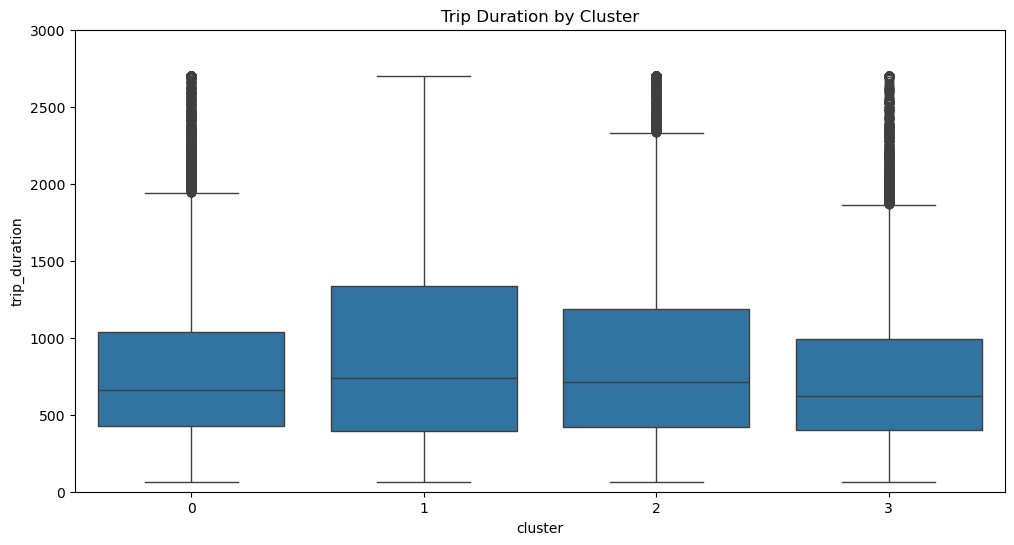

In [116]:
# check Distribution of trip_duration by cluster (limiting y-axis to see the distribution better)
plt.figure(figsize=(12,6))
sns.boxplot(x='cluster',y='trip_duration', data=citibike_with_clusters)
plt.title('Trip Duration by Cluster')
plt.ylim(0,3000)
plt.show()

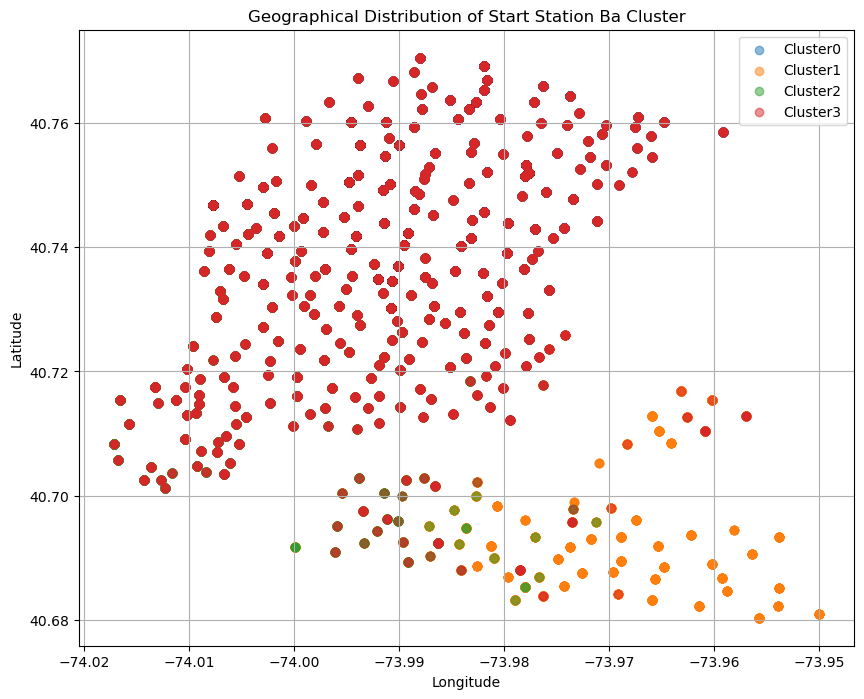

In [117]:
# check the geographical distribution of start station by cluster
plt.figure(figsize=(10,8))
for cluster in range(4):
    cluster_data=citibike_with_clusters[citibike_with_clusters['cluster']==cluster]
    plt.scatter(cluster_data['start_station_longitude'],
                    cluster_data['start_station_latitude'],
                    alpha=0.5,
                    label=f'Cluster{cluster}')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographical Distribution of Start Station Ba Cluster')
plt.legend()
plt.grid(True)
plt.show()

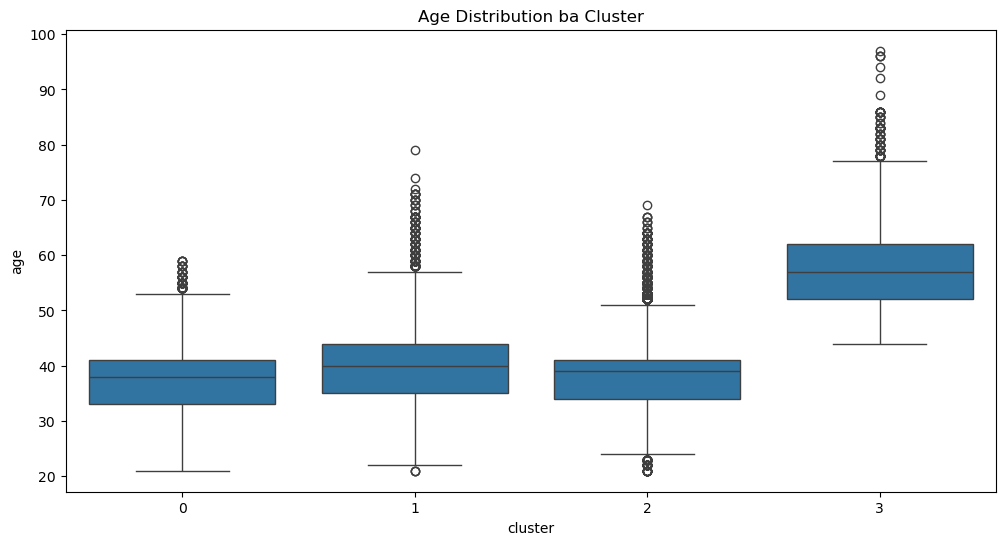

In [118]:
# check the age distribution by cluster
plt.figure(figsize=(12,6))
sns.boxplot(x='cluster',y='age', data=citibike_with_clusters)
plt.title('Age Distribution ba Cluster')
plt.show()

<Figure size 1200x600 with 0 Axes>

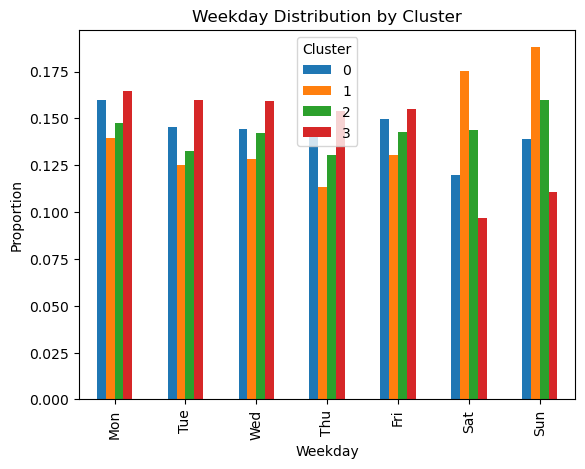

In [119]:
# check the weekday and hour distribution by cluster
weekday_order=['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
weekday_counts=pd.crosstab(citibike_with_clusters['cluster'],citibike_with_clusters['weekday'])
weekday_counts=weekday_counts.reindex(columns=weekday_order)
weekday_proportions=weekday_counts.div(weekday_counts.sum(axis=1),axis=0)

plt.figure(figsize=(12,6))
weekday_proportions.T.plot(kind='bar',stacked=False)
plt.title('Weekday Distribution by Cluster')
plt.ylabel('Proportion')
plt.xlabel('Weekday')
plt.legend(title='Cluster')
plt.show()

<Figure size 1400x600 with 0 Axes>

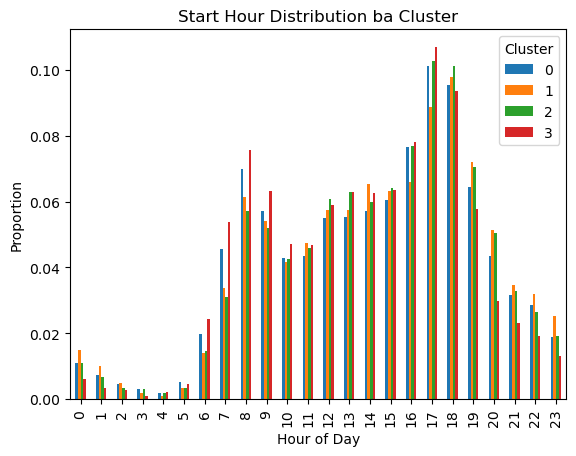

In [120]:
# Hour distribution
hour_counts=pd.crosstab(citibike_with_clusters['cluster'],citibike_with_clusters['start_hour'])
hour_proportions=hour_counts.div(hour_counts.sum(axis=1),axis=0)

plt.figure(figsize=(14,6))
hour_proportions.T.plot(kind='bar',stacked=False)
plt.title('Start Hour Distribution ba Cluster')
plt.ylabel('Proportion')
plt.xlabel('Hour of Day')
plt.legend(title='Cluster')
plt.xticks(range(24))
plt.show()

# K-means Clustering Analysis of citibike data:

Cluster interpretation and Insights: After analysing the descriptive statistics and visualization for  4 clusters, can interpret the results as follows;

Do the Cluster make sense?
Looking at the geographical distribution, trip duration patterns, and demographic characteristics, the clusters do appear to capture meaningful patterns in the citibike usage data:
1. Cluster 0: Appears to represent longer trips,possibly recreational rides or commutes from outer areas.
2. Cluster 1: Shows a concentration in central Manhattan with shorter trip durations,likely representing quick point to points trips.
3. Cluster 2: Has distinct geographical patterns with morderate trip durations.
4. Cluster 3: Shows unique temporal patterns (weekday/hour distribution) that differ from other clusters.

The clusters have captured both geographical and behavioral differences among riders, which is valuable for understanding usage patterns.



# Limitations and further Explorations:

While the clusters do reveal patterns , there are some limitations;
  1. The geographical clustering is heavily influenced by the start and end coordinates.
  2. We may need to explore additional features like weather data or special events.
  3. Some clusters may be overly broad and could benefit from further segmentation.


# Ptential Applications in an Analytics Pipeline:
 These clustering results could be useful for :
 1. Targeted Marketing: Different massaging for different rider segments.
 2. Bike Rebalancing: Ooptimizing bike availability based on cluster-specific demand patterns.
 3. Pricing Stategies: Developing different pricing models for different for different usage patterns.
 4. Infrastructure Planning: Identifying where to add new stations based on cluster characteristics.
 5. Predictive Modeling: Using cluster membership as a feature in predictive models for trip duration or demand. 

# To enhance this analysis , we could;
  1. Incorporate temporal features more explicitly(season,holiday vs. non-holiday)
  2. Add external data sources( weather,events,public transit disruptions)
  3. Experiment with different clustering algorithms(DBSCAN for geographical clustering)
  4. Develop a classification model to predict cluster membership for new rides.

     Overall these clusters provide a solid foundation for understanding different rider behaviours and can inform various business decisions for citibike operations.